In [2]:
def dataInput(fileName):
    #Chargemment des données
    dataL= []
    f = open(fileName,"rb")
    readerT = csv.reader(f, delimiter=',', dialect='excel')
    for row in readerT:
        dataL.append(row)
    f.close()
    headings = []
    headings.append(dataL.pop(0)) #removing column heads
    dataA = np.array(dataL)
    #print ' dataA.ndim = ',dataA.ndim,' dataA.shape = ',dataA.shape,' dataA.size = ',dataA.size
    #print 'dataA.dtype = ',dataA.dtype,' dataA.itemsize = ',dataA.itemsize 
    return dataA, headings

Prix vs surface totale (colonnes 38 (sous-sol) & 46 (surface habitée) ) et condition de vente (colonne 79)

In [3]:
def PriceSurface(dataA):
    #
    x1L = []
    y1L = []
    x2L = []
    y2L = []
    x3L = []
    y3L = []
    x4L = []
    y4L = []
    x5L = []
    y5L = []
    x6L = []
    y6L = []
    #Condition de vente
    for i in range(dataA.shape[0]):
        if dataA[i,79] == 'Normal':
            x1L.append(float(dataA[i,38]) + float(dataA[i,46]))
            y1L.append(dataA[i,-1])
        elif dataA[i,79] == 'Abnorml':
            x2L.append(float(dataA[i,38]) + float(dataA[i,46]))
            y2L.append(dataA[i,-1])
        elif dataA[i,79] == 'AdjLand':
            x3L.append(float(dataA[i,38]) + float(dataA[i,46]))
            y3L.append(dataA[i,-1])
        elif dataA[i,79] == 'Alloca':
            x4L.append(float(dataA[i,38]) + float(dataA[i,46]))
            y4L.append(dataA[i,-1])
        elif dataA[i,79] == 'Family':
            x5L.append(float(dataA[i,38]) + float(dataA[i,46]))
            y5L.append(dataA[i,-1])
        elif dataA[i,79] == 'Partial':
                x6L.append(float(dataA[i,38]) + float(dataA[i,46]))
                y6L.append(dataA[i,-1])  
    x1 = np.array(x1L,dtype = 'f')
    y1 = np.array(y1L,dtype = 'f')
    x2 = np.array(x2L,dtype = 'f')
    y2 = np.array(y2L,dtype = 'f')
    x3 = np.array(x3L,dtype = 'f')
    y3 = np.array(y3L,dtype = 'f')
    x4 = np.array(x4L,dtype = 'f')
    y4 = np.array(y4L,dtype = 'f')
    x5 = np.array(x5L,dtype = 'f')
    y5 = np.array(y5L,dtype = 'f')
    x6 = np.array(x6L,dtype = 'f')
    y6 = np.array(y6L,dtype = 'f')
    print ' corMat for Normal contracts only and all areas vs price = '
    print np.corrcoef(x1,y1,rowvar=0)
    print ' corMat for Abnorml contracts only and all areas vs price = '
    print np.corrcoef(x2,y2,rowvar=0)
    print ' corMat for Partial contracts only and all areas vs price = '
    print np.corrcoef(x6,y6,rowvar=0)
    x1Le = len(x1L)
    x2Le = len(x2L)
    x3Le = len(x3L)
    x4Le = len(x4L)
    x5Le = len(x5L)
    x6Le = len(x6L)
    label1 = 'Normal'+ ' '+ str(x1Le) + ' '+str(int(100.*x1Le/len(dataA[:,80])))+'%'
    label2 = 'Abnorml' + ' '+ str(x2Le) + ' '+str(int(100.*x2Le/len(dataA[:,80])))+'%'
    label3 = 'AdjLand' + ' '+ str(x3Le) + ' '+str(int(100.*x3Le/len(dataA[:,80])))+'%'
    label4 = 'Alloca' + ' '+ str(x4Le) + ' '+str(int(100.*x4Le/len(dataA[:,80])))+'%'
    label5 = 'Family' + ' '+ str(x5Le) + ' '+str(int(100.*x5Le/len(dataA[:,80])))+'%'
    label6 = 'Partial' + ' '+ str(x6Le) + ' '+str(int(100.*x6Le/len(dataA[:,80])))+'%'

    fig = plt.figure(figsize(12,9), dpi = 80)
    plt.xlim(0,8000)
    plt.ylim(0,800000)
    plt.title('PRICE vs TOTAL FOOTAGE')
    plt.xlabel('SQ FT')
    plt.ylabel('PRICE')
     #scatter(x1,y1,c='r',s=200,alpha=0.5,label = 'Normal')
    scatter(x1,y1,c='r',s=200,alpha=0.5,label = label1)
    scatter(x2,y2,c='b',s=200,alpha=0.5,label = label2)
    scatter(x3,y3,c='g',s=200,alpha=0.5, label = label3)
    scatter(x4,y4,c='y',s=200,alpha=0.5, label = label4)
    scatter(x5,y5,c='c',s=200,alpha=0.5, label = label5)
    scatter(x6,y6,c='k',s=200,alpha=0.5, label = label6)
    plt.legend(loc='upper left',fontsize=20)

Identification d'exemples outliers (surface totale trop élevée vs prix): lignes 1498, 2180 & 2181

In [4]:
def outliers(dataA):
    for j in range(len(dataA[:,36])):
        if float(dataA[j,38]) + float(dataA[j,46]) > 7500:
            print ' example (j+1) ', j+1,' is outlier',' since area = ',
            print float(dataA[j,38]) + float(dataA[j,46]),' and price = ',dataA[j,-1]

In [5]:
def corMat(x1,y1):
    return np.corrcoef(x1,y1,rowvar=0)

Calcul de corrélations prix vs surface pour surface totale (c38+c46) et surfaces composantes (c38 (sous-sol) & c46 (habitée))

In [6]:
def PriceSurfaceCalculations(dataA):        
    PriceSurface(dataA)
    price = np.array(dataA[:,-1],dtype = 'f')
    surfaceL = []
    for i in range(len(dataA[:,36])):
        surfaceL.append((dataA[i,38]+dataA[i,46]))
    surfaceT = np.array(surfaceL,dtype = 'f')
    surfaceB = np.array(dataA[:,38],dtype = 'f')
    surfaceGLA = np.array(dataA[:,46],dtype = 'f')
    print ' corMat for all contracts and all areas vs price = '
    print corMat(surfaceT,price)
    print ' corMat for all and Basement area vs price = '
    print corMat(surfaceB,price)
    print ' corMat for all and Gr living area vs price= '
    print corMat(surfaceGLA,price)
    return 'ok'

Corrélation entre surface totale (C38 + C46) vs prix

In [7]:
def case2_sum2surfaces(dataA,colDigitPrice,model,alpha):
    #ARRAY OF INPUTS
    totalSurface = np.zeros((dataA.shape[0],1),dtype='f')
    for i in range(dataA.shape[0]):
        totalSurface[i][0] = float(dataA[i,38])+float(dataA[i,46])
    clf = LR_models(model,totalSurface,colDigitPrice,alpha)
    print totalSurface.shape, colDigitPrice.shape
    print ' Case 2: sum of 2 surfaces with LR model = ',model,' and alpha = ',alpha
    print 'clf.coef =',clf.coef_,' clf.coef_.shape = ',clf.coef_.shape
    #print 'clf.get_params() = ',clf.get_params()#inutile
    #print 'clf.intercept = ',clf.intercept_
    #print 'clf.score(X,y) R^2 = ',clf.score(totalSurface,colDigitPrice)
    if model == 'RidgeCV':
        print 'clf.alpha estimated = ',clf.alpha_
    predictedY = clf.predict(totalSurface)
    error = 0
    for i in range(dataA.shape[0]):   
        error += np.abs(colDigitPrice[i]-predictedY[i])/colDigitPrice[i]
    errorA = 100*error/dataA.shape[0]
    print ' error at training = ', errorA
    return errorA

Identification des colonnes numériques version sans col 12

In [8]:
def colDigitN(dataA):
    colDigit = []
    for i in range(dataA.shape[1]):
        if str(dataA[0,i]).isdigit():
            colDigit.append(i)
    colDigit.pop(0)
    colDigit.remove(3) #too many no digit
    colDigit.remove(26) #too many no digit
    colDigit.remove(59) #too many no digit
    return colDigit

Identification des colonnes numériques version avec col 12

In [9]:
def colDigitFn(dataA):
    colDigit = []
    for i in range(dataA.shape[1]):
        if str(dataA[0,i]).isdigit():
            colDigit.append(i)
    #print 'len(colDigit) = ',len(colDigit)
    #print colDigit
    colDigit.pop(0)
    colDigit.remove(3) #too many no digit
    colDigit.remove(26) #too many no digit
    colDigit.remove(59) #too many no digit
    colDigit.insert(2,12) # + new col 12 modifiée
    return colDigit

Création du tableau contenant les données des colonnes numériques version sans col 12

In [10]:
def corMatDS(colDigit,dataA):
    colDigitArray = arange(len(colDigit)*dataA.shape[0],dtype='f').reshape(dataA.shape[0],len(colDigit))
    nodig = 0
    for j in range(dataA.shape[0]):
        ii = 0                                                               
        for i in colDigit:
            if not str(dataA[j,i]).isdigit():
                colDigitArray[j,ii] = 0.  #for 332,47 & 332,48
                nodig += 1
                ii += 1                
            else:
                colDigitArray[j,ii] = float(dataA[j,i])
                ii += 1
    if nodig != 0:
        print 'nodig = ',nodig
    np.savetxt("colDigitArray.csv", colDigitArray, delimiter=",",fmt = '%s')
    return colDigitArray 

Création du tableau contenant les données des colonnes numériques version avec col 12

In [11]:
def digitArrayPlus12Fn(colDigit,dataA,coL12):
    colDigitArray = arange((len(colDigit)-1)*dataA.shape[0],dtype='f').reshape(dataA.shape[0],(len(colDigit)-1))
    #print 'len(colDigit) = ',len(colDigit)
    nodig = 0
    #print 'colDigit = ',colDigit
    #INSERT 12 AT POSITION 2 THEN AT I = 12 coldigitarray = coL12[j]
    for j in range(dataA.shape[0]):
        ii = 0 
        for i in colDigit:                                                           
            if i != 12 and not str(dataA[j,i]).isdigit():
                colDigitArray[j,ii] = 0.  #for 332,47 & 332,48
                nodig += 1
                ii += 1
            else:
                if i == 12 :
                    colDigitArray[j,ii] = float(coL12[j])
                    ii += 1
                else:
                    if i == 80 : #removing price
                        pass
                    else:
                        colDigitArray[j,ii] = float(dataA[j,i])
                        ii += 1
    #if nodig != 0:
        #print 'À corMatDSPlus12 nodig = ',nodig,' remplacé par 0.'
    return colDigitArray 

Analyse de corrélation sur les conditions de vente (colonne 79) par fréquence vs prix: 
Résultats: corrélation linéaire basse: 0.0088

In [12]:
def col79(dataA):
    arr79 = colDigitArray = arange(dataA.shape[0],dtype='f').reshape(dataA.shape[0],1)
    priceNL = []
    priceAbL = []
    priceAdL = []
    priceAlL = []
    priceFL = []
    pricePL = []
    for i in range(dataA.shape[0]):
        if dataA[i,79] == 'Normal':
            #arr79[i] = 6
            priceNL.append(dataA[i,-1])
        elif dataA[i,79] == 'Abnorml':
            #arr79[i] = 4
            priceAbL.append(dataA[i,-1])
        elif dataA[i,79] == 'AdjLand':
            #arr79[i] = 1
            priceAdL.append(dataA[i,-1])
        elif dataA[i,79] == 'Alloca':
            #arr79[i] = 2
            priceAlL.append(dataA[i,-1])
        elif dataA[i,79] == 'Family':
            #arr79[i] = 3
            priceFL.append(dataA[i,-1])
        elif dataA[i,79] == 'Partial':
            #arr79[i] = 5
            pricePL.append(dataA[i,-1])
    #Classement par fréquence
    for i in range(dataA.shape[0]):
        if dataA[i,79] == 'Normal':
            arr79[i] = float(len(priceNL))/float(dataA.shape[0])
        elif dataA[i,79] == 'Abnorml':
            arr79[i] = float(len(priceAbL))/float(dataA.shape[0])
        elif dataA[i,79] == 'AdjLand':
            arr79[i] = float(len(priceAdL))/float(dataA.shape[0])
        elif dataA[i,79] == 'Alloca':
            arr79[i] = float(len(priceAlL))/float(dataA.shape[0])
        elif dataA[i,79] == 'Family':
            arr79[i] = float(len(priceFL))/float(dataA.shape[0])
        elif dataA[i,79] == 'Partial':
            arr79[i] = float(len(pricePL))/float(dataA.shape[0])
    priceN = np.array(priceNL,dtype = float).reshape(len(priceNL))
    priceAb = np.array(priceAbL,dtype = float).reshape(len(priceAbL))
    priceAd = np.asarray(priceAdL,dtype = float).reshape(len(priceAdL))
    priceAl = np.asarray(priceAlL,dtype = float).reshape(len(priceAlL))
    priceF = np.asarray(priceFL,dtype = float).reshape(len(priceFL))
    priceP = np.asarray(pricePL,dtype = float).reshape(len(pricePL))
    print  'priceN.size = ',priceN.size,' priceN.mean() = ',priceN.mean(),' priceN.std() = ',priceN.std(),'Var/mean = ',priceN.std()/priceN.mean()
    print  'priceAb.size = ',priceAb.size,' priceAb.mean() = ',priceAb.mean(),' priceAb.std() = ',priceAb.std(),'Var/mean = ',priceAb.std()/priceAb.mean()
    print  'priceAd.size = ',priceAd.size,' priceAd.mean() = ',priceAd.mean(),' priceAd.std() = ',priceAd.std(),'Var/mean = ',priceAd.std()/priceAd.mean()
    print  'priceAl.size = ',priceAl.size,' priceAl.mean() = ',priceAl.mean(),' priceAl.std() = ',priceAl.std(),'Var/mean = ',priceAl.std()/priceAl.mean()
    print  'priceF.size = ',priceF.size,' priceF.mean() = ',priceF.mean(),' priceF.std() = ',priceF.std(),'Var/mean = ',priceF.std()/priceF.mean()
    print  'priceP.size = ',priceP.size,' priceP.mean() = ',priceP.mean(),' priceP.std() = ',priceP.std(),'Var/mean = ',priceP.std()/priceP.mean()
    return arr79

Analyse de corrélation sur la localisation par zone (colonne 2) par fréquence: 
Résultats: corrélation linéaire = 0.28 non ajoutée

In [13]:
def col2(dataA):
    arr2 = colDigitArray = arange(dataA.shape[0],dtype='f').reshape(dataA.shape[0],1)
    MSZaL = []
    MSZcL = []
    MSZfvL = []
    MSZiL = []
    MSZrhL = []
    MSZrlL = []
    MSZrpL = []
    MSZrmL = []
    #Données par zone
    for i in range(dataA.shape[0]):
        if dataA[i,2] == 'A (agr)':
            #arr2[i] = 2
            MSZaL.append(dataA[i,-1])
        elif dataA[i,2] == 'C (all)':
            #arr2[i] = 3
            MSZcL.append(dataA[i,-1])
        elif dataA[i,2] == 'FV':
            #arr2[i] = 8
            MSZfvL.append(dataA[i,-1])
        elif dataA[i,2] == 'I':
            #arr2[i] = 1
            MSZiL.append(dataA[i,-1])
        elif dataA[i,2] == 'RH':
            #arr2[i] = 4
            MSZrhL.append(dataA[i,-1])
        elif dataA[i,2] == 'RL':
            #arr2[i] = 6
            MSZrlL.append(dataA[i,-1])
        elif dataA[i,2] == 'RP':
            #arr2[i] = 7
            MSZrpL.append(dataA[i,-1])
        elif dataA[i,2] == 'RM':
            #arr2[i] = 5
            MSZrmL.append(dataA[i,-1])
    #Classification par fréquence
    for i in range(dataA.shape[0]):
        if dataA[i,2] == 'A (agr)':
            arr2[i] = float(len(MSZaL))/float(dataA.shape[0])
        elif dataA[i,2] == 'C (all)':
            arr2[i] = float(len(MSZcL))/float(dataA.shape[0])
        elif dataA[i,2] == 'FV':
            arr2[i] = float(len(MSZfvL))/float(dataA.shape[0])
        elif dataA[i,2] == 'I':
            arr2[i] = float(len(MSZiL))/float(dataA.shape[0])
        elif dataA[i,2] == 'RH':
            arr2[i] = float(len(MSZrhL))/float(dataA.shape[0])
        elif dataA[i,2] == 'RL':
            arr2[i] = float(len(MSZrlL))/float(dataA.shape[0])
        elif dataA[i,2] == 'RP':
            arr2[i] = float(len(MSZrpL))/float(dataA.shape[0])
        elif dataA[i,2] == 'RM':
            arr2[i] = float(len(MSZrmL))/float(dataA.shape[0])
            MSZrmL.append(dataA[i,-1])
    sumL =  len(MSZaL)+len(MSZcL)+len(MSZfvL)+len(MSZiL)+len(MSZrhL)+len(MSZrlL)+len(MSZrpL)+len(MSZrmL)    
    MSZa = np.array(MSZaL,dtype = float).reshape(len(MSZaL))
    MSZc = np.array(MSZcL,dtype = float).reshape(len(MSZcL))
    MSZfv = np.asarray(MSZfvL,dtype = float).reshape(len(MSZfvL))
    MSZi = np.asarray(MSZiL,dtype = float).reshape(len(MSZiL))
    MSZrh = np.asarray(MSZrhL,dtype = float).reshape(len(MSZrhL))
    MSZrl = np.asarray(MSZrlL,dtype = float).reshape(len(MSZrlL))
    MSZrp = np.asarray(MSZrpL,dtype = float).reshape(len(MSZrpL)) 
    MSZrm = np.asarray(MSZrmL,dtype = float).reshape(len(MSZrmL))
    
    print  'len(MSZaL) = ',len(MSZaL),'MSZa.size = ',MSZa.size,' MSZa.mean() = ',MSZa.mean(),' MSZa.std() = ',MSZa.std(),'std/mean = ',MSZa.std()/MSZa.mean()
    print  'len(MSZcL) = ',len(MSZcL),'MSZc.size = ',MSZc.size,' MSZc.mean() = ',MSZc.mean(),' MSZc.std() = ',MSZc.std(),'std/mean = ',MSZc.std()/MSZc.mean()
    print  'len(MSZfvL) = ',len(MSZfvL),'MSZfv.size = ',MSZfv.size,' MSZfv.mean() = ',MSZfv.mean(),' MSZfv.std() = ',MSZfv.std(),'std/mean = ',MSZfv.std()/MSZfv.mean()
    print  'len(MSZiL) = ',len(MSZiL),'MSZi.size = ',MSZi.size,' MSZi.mean() = ',MSZi.mean(),' MSZi.std() = ',MSZi.std(),'std/mean = ',MSZi.std()/MSZi.mean()
    print  'len(MSZrhL) = ',len(MSZrhL),'MSZrh.size = ',MSZrh.size,' MSZrh.mean() = ',MSZrh.mean(),' MSZrh.std() = ',MSZrh.std(),'std/mean = ',MSZrh.std()/MSZrh.mean()
    print  'len(MSZrlL) = ',len(MSZrlL),'MSZrl.size = ',MSZrl.size,' MSZrl.mean() = ',MSZrl.mean(),' MSZrl.std() = ',MSZrl.std(),'std/mean = ',MSZrl.std()/MSZrl.mean()
    print  'len(MSZrpL) = ',len(MSZrpL),'MSZrp.size = ',MSZrp.size,' MSZrp.mean() = ',MSZrp.mean(),' MSZrp.std() = ',MSZrp.std(),'std/mean = ',MSZrp.std()/MSZrp.mean()
    print  'len(MSZrmL) = ',len(MSZrmL),'MSZrm.size = ',MSZrm.size,' MSZrm.mean() = ',MSZrm.mean(),' MSZrm.std() = ',MSZrm.std(),'std/mean = ',MSZrm.std()/MSZrm.mean()
    print ' dataA.shape[0] = ',dataA.shape[0],' sum lists = ',sumL
    return arr2

Analyse de corrélation sur la localisation par quartier de Ames City (colonne 12) par prix moyen par quartier: 
Résultats: corrélation linéaire =  0.7 ajoutée

In [14]:
def col12(dataA):
    location = ['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','Greens','GrnHill','IDOTRR','MeadowV','Mitchel','NAmes','NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']
    #Erreur de description des données; à ajouter: 'Greens' & 'GrnHill' et correction 'ClearCr'
    count = np.zeros(len(location), dtype=float)
    price = np.zeros(len(location), dtype=float)
    #Classement des données selon le quatier
    for i in range(dataA.shape[0]):
        for j in range(len(location)):
            if dataA[i,12] == location[j]:
                count[j] += 1
                price[j] += float(dataA[i,80])
    #Calcul du prix moyen par quartier
    avPrice = []
    for j in range(len(location)):
        avPrice.append((j,price[j]/count[j]))              
         #print ' count for ',location[j],' = {0:4.0f}'.format(count[j]),' average selling price = {:15.0f}'.format(float(avPrice[j][1]))
    #Classement prix moyen vs quartier
    avPrice.sort(key=itemgetter(1),reverse=True)
     #for i in range(len(avPrice)):
         #print location[avPrice[i][0]],count[avPrice[i][0]],avPrice[i][1]
    ar12 = np.zeros(dataA.shape[0], dtype=float).reshape(dataA.shape[0],1)
    #Assignation d'une cote selon la classe de prix moyen
    for i in range(dataA.shape[0]):
        for j in range(len(avPrice)):
            if dataA[i,12] == location[avPrice[j][0]]:
                ar12[i] = float(len(avPrice) - j)
                break    
        if ar12[i] == 0:
            print ' ar12[',i,'] is zero'
    return ar12

Choix et implantation de modèles linéaires de sklearn avec régulation

In [15]:
def LR_models(model,X,y,fit_intercept,alpha):
    #fit_intercept = True #=NORMAL
    #fit_intercept = False
    if model == 'Ridge':
        #lrMR = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None,tol=0.001, solver='auto', random_state=None)
        lrMR = Ridge(alpha,fit_intercept)
    elif model == 'Lasso':
        #lrMR = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False,copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
        lrMR = Lasso(alpha,fit_intercept)
    elif model == 'RidgeCV':
        #lrMR = RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None,cv=None, gcv_mode=None, store_cv_values=False)
        lrMR = RidgeCV((0.1, 1.0, 10.0),fit_intercept)
    elif model == 'ElasticNet':
        l1_ratio=0.5
        max_iter=1000
        tol=0.0001
        Precompute=False
        fit_intercept=True
        lrMR = ElasticNet(alpha, l1_ratio=0.5, fit_intercept=True, normalize=False,precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None,selection='cyclic')
        #lrMR = ElasticNet(alpha, l1_ratio,fit_intercept,Precompute,max_iter,tol)
        #lrMR = ElasticNet(alpha,fit_intercept)
    elif model == 'LassoCV':
        print 'AT LASSOCV with lrMR = LassoCV(eps=0.001, n_alphas=100, alphas=None, '
        print "fit_intercept=True, normalize=False,precompute='auto', max_iter=1000, "
        print 'tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False,'
        print "random_state=None, selection='cyclic')"
        #lrMR = LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False,precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1, positive=False,random_state=None, selection='cyclic')
        #AT ALPHA = 0, BELOW NOT WORKING
        lrMR = LassoCV(alpha,fit_intercept)
    elif model == 'LassoLarsCV':
        #lrMR = LassoLarsCV(fit_intercept=True, verbose=False, max_iter=500, normalize=True,precompute='auto', cv=None, max_n_alphas=1000, n_jobs=1, eps=2.2204460492503131e-16, copy_X=True,positive=False)
         lrMR = LassoLarsCV(fit_intercept)
    else:
        print 'Modèle linéaire = ',model,' non existant'
        return 0
    lrMR.fit(X,y)
    return lrMR 

Méthodes de sélection de features

In [16]:
def featureSelectionCorCoef(arX,arY,k):
    #Par ordre de coefficients de corrélation
    dataM = np.insert(arX,arX.shape[1],arY,axis=1)
    corMat = np.corrcoef(dataM.T)
    decliningR2 = []
    selectedFeatures = []
    for i in range(corMat.shape[0]):
        decliningR2.append((i,np.abs(corMat[i,-1])))
    decliningR2.sort(key=itemgetter(1),reverse=True)
    #orderedArrayV = arange(arX.shape[0]*colDigitArray.shape[1],dtype='f').reshape(colDigitArray.shape[0],colDigitArray.shape[1])
    orderedArrayV = arange(arX.shape[0]*(k),dtype='f').reshape(arX.shape[0],(k))
    #print 'colDigitArray[i,decliningR2[j+1][0]] = ',colDigitArray[i,decliningR2[1][0]]
    for j in range(k):
        selectedFeatures.append(decliningR2[j+1][0])
        A = decliningR2[j+1][0]
        for i in range(arX.shape[0]):
            orderedArrayV[i,j] = arX[i,decliningR2[j+1][0]]
    print 'orderedArrayV.shape = ',orderedArrayV.shape
    #print 'selectedFeatures = ',selectedFeatures
    return orderedArrayV,k,selectedFeatures

In [17]:
def featureSelection2CorCoef(arX,arY,k):
    #Par ordre de coefficients de corrélation; inclu les graphiques 
    dataM = np.insert(arX,arX.shape[1],arY,axis=1)
    corMat = np.corrcoef(dataM.T)
    decliningR2 = []
    selectedFeatures = []
    for i in range(corMat.shape[0]):
        decliningR2.append((i,np.abs(corMat[i,-1])))
    decliningR2.sort(key=itemgetter(1),reverse=True)
    print 'len(decliningR2) = ',len(decliningR2)
    print 'arX.shape = ',arX.shape
    #orderedArrayV = arange(arX.shape[0]*colDigitArray.shape[1],dtype='f').reshape(colDigitArray.shape[0],colDigitArray.shape[1])
    orderedArrayV = arange(arX.shape[0]*(k),dtype='f').reshape(arX.shape[0],(k))
    #print 'colDigitArray[i,decliningR2[j+1][0]] = ',colDigitArray[i,decliningR2[1][0]]
    for j in range(1,k):
        selectedFeatures.append(decliningR2[j+1][0])
        #print 'decliningR2[j+1][0] = ',decliningR2[j+1][0]
        for i in range(arX.shape[0]): 
            orderedArrayV[i,j] = arX[i,decliningR2[j+1][0]]
    #print 'selectedFeatures = ',selectedFeatures
    label1 = 'R**2'
    label2 = 'Variable ID'
    x = []
    y = []
    for i in range(len(decliningR2)):
        x.append(decliningR2[i][0])
        y.append(decliningR2[i][1])
    fig1 = plt.figure(figsize(6,3), dpi = 80)
    plt.xlim(0,len(x))
    plt.ylim(0,1.1)
    plt.title('R2 vs Variable ID: FOR DEG 2 TRANSFO OF SELECTED 9 best features =  [34, 3, 2, 14, 10, 23, 24, 11, 5]')
    plt.xlabel('Variable ID')
    plt.ylabel('R**2')
    scatter(x,y,c='r',s=200,alpha=0.5,label = label1)
    plt.legend(loc='lower left',fontsize=20)
    
    fig2 = plt.figure(figsize(6,3), dpi = 80)
    #plt.xlim(0,35)
    plt.ylim(0,1.1)
    plt.title('RANKED R**2 & PRICE OR DEG 2 TRANSFO OF SELECTED 9 best features')
    plt.xlabel('Distribution')
    plt.ylabel('R**2')
    x1 = np.linspace(0,len(x),num=len(x))
    scatter(x1,y,c='r',s=200,alpha=0.5,label = label1)
    plt.legend(loc='upper right',fontsize=20)
    """"""
    return orderedArrayV,k,selectedFeatures

In [18]:
def featureSelectionFR(arX,arY,k):
    #Univariate linear regression tests.
    #Quick linear model for testing the effect of a single regressor, sequentially for many regressors.
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_regression
    #SELECTING k BEST CORING FEATURES
    selectedFeatures = []
    X_new = SelectKBest(f_regression, k).fit_transform(arX, arY)
    clf = SelectKBest(f_regression, k).fit(arX, arY)
    selFea = clf.get_support()
    for i in range(len(selFea)):
        if selFea[i] == True:
            selectedFeatures.append(i)
    #print selectedFeatures
    #print 'arX.shape = ',arX.shape
    #print 'X_new.shape = ',X_new.shape
    return X_new, k,selectedFeatures

In [19]:
def featureSelectionMIR(arX,arY,k):
    #NOT WORKING
    #from sklearn.feature_selection import mutual_info_regression
    import sklearn.feature_selection
    selectedFeatures = []
    #MAKE k = n_neighbors=3
    X_new = sklearn.feature_selection.mutual_info_regression(X, y, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)
    print 'arX.shape = ',arX.shape
    print 'X_new.shape = ',X_new.shape
    return X_new, k,selectedFeatures

In [20]:
def featureSelectionRFE(X,y,estimator,n_features_to_select):
    #Feature ranking with recursive feature elimination
    from sklearn.feature_selection import RFE
    #RFE(estimator, n_features_to_select=None, step=1, verbose=0)#if none : 50% of features selected
    #estimator = SVR(kernel="linear")
    #selector = RFE(estimator, 5, step=1)
    selectedFeatures = []
    selector = RFE(estimator,n_features_to_select, step=1)
    selector = selector.fit(X, y) #fitting RFE then estimator model on selected features
    selFea = selector.support_
    for i in range(len(selFea)):
        if selFea[i] == True:
            selectedFeatures.append(i)
    #print selectedFeatures
    #selector.support_ #array of shape n_features = mask or integer index of selected features
    #selector.ranking_ #array of shape n_features feature ranking; ranking_[i] = position of ith feature; best ranking = 1
    #selector.predict(X,y)
    #selector.score(X,y)
    new_X = selector.transform(X)#reduces X to selected features
    #selector.fit_transform(X,y)  #fit_transform(X, y=None, **fit_params) 
    #Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
    return new_X, n_features_to_select,selectedFeatures 

In [21]:
def featureSelectionSFM(X,y,estimator,k,threshold):
    #Select from model Meta-transformer for selecting features based on importance weights.
    #SFM selects a specific nb of best features dependong on threshold which is NOT equal to nb of selected features
    #Ici, threshold = nombre total k de variables considérées, utiliser un grand seuil (>1000) si utilisation du prix, petit si log(prix)
    #sfm = SelectFromModel(estimator, threshold='median') = 50% of dim; threshold = 1 & 0.1 & 10 7 100 = most dim
    from sklearn.feature_selection import SelectFromModel 
    sfm = SelectFromModel(estimator, threshold)
    selectedFeatures = []
    #sfm = SelectFromModel(estimator, threshold=k)
    sfm.fit(X, y)
    n_features = sfm.transform(X).shape[1]
    new_X = sfm.transform(X) # Reduce X to the selected features
    selFea = sfm.get_support()
    for i in range(len(selFea)):
        if selFea[i] == True:
            selectedFeatures.append(i)
    #print selectedFeatures
    # Reset the threshold till the number of features equals two.
    # Note that the attribute can be set directly instead of repeatedly
    # fitting the metatransformer.
    #while n_features > 2:
        #sfm.threshold += 0.1
        #X_transform = sfm.transform(X)
        #n_features = X_transform.shape[1]
    return new_X,n_features,selectedFeatures,threshold 

Choix d'une méthode de sélection de features: retourne un tableau des meilleures features et k: nb de features

In [22]:
def bestFeatureMethod(method,X,y,estimator,k):
    if method == 'corCoef' :
        return featureSelectionCorCoef(X,y,k)
    elif method == 'FR' :
        return featureSelectionFR(X,y,k)
    elif method == 'MIR' :
        return featureSelectionMIR(X,y,k) #NOT WORKING
    elif method == 'RFE' :
        kn_features_to_select = k
        return featureSelectionRFE(X,y,estimator,kn_features_to_select)
        #k = n_features_to_select
    elif method == 'SFM' :
        threshold = 1500
        return featureSelectionSFM(X,y,estimator,k,threshold)
    else:
        print 'No feature selection method corresponds to method ',method
        return 0,0
    

CAS 1: modeles de regression lineaire avec best selected features

In [23]:
def case1_LR_BestFeatures(colDigitPrice,colDigitCorVar,fit_intercept,model,alpha):
    #lR MODEL WITHOUT PARAMETER SELECTION 
    clf = LR_models(model,colDigitCorVar,colDigitPrice,fit_intercept,alpha)
    #print ' Case 1: ',nbInputs,' best selected digit features with LR model = ',model,' and alpha = ',alpha
    #print 'clf.coef = ',clf.coef_,' clf.coef_.shape = ',clf.coef_.shape
    #print 'clf.get_params() = ',clf.get_params() #inutile
    #print 'clf.intercept = {0:1.12}'.format(clf.intercept_)
    #print 'clf.score(X,y) R^2 = {0:1.3}'.format(clf.score(colDigitCorVar,colDigitPrice))
    if model == 'RidgeCV':
        print 'model == RidgeCV clf.alpha estimated = ',clf.alpha_
    predictedY = clf.predict(colDigitCorVar)
    error = 0
    for i in range(dataA.shape[0]):   
        error += np.abs(colDigitPrice[i]-predictedY[i])/colDigitPrice[i]
    errorA = 100*error/dataA.shape[0]
    #print ' error at training = {0:2.7}'.format(errorA),'%'
    return clf, errorA

In [24]:
def kernelRidgeFn(arX,arY,alpha,degree):
    from sklearn.kernel_ridge import KernelRidge
    #NON utilisée
    #KernelRidge(alpha, coef0=1, degree, gamma=None, kernel='linear',kernel_params=None)
    #clf = KernelRidge(alpha)
    coef0 = 1
    gamma = None
    kernel = 'linear'
    kernel_params=None
    clf = KernelRidge(alpha, coef0, degree, gamma, kernel,kernel_params)
    clf.fit(arX, arY) 
    predictedY = clf.predict(arX)
    error = 0
    for i in range(arX.shape[0]):   
        error += np.abs(arY[i]-predictedY[i])/arY[i]
    errorA = int(100*error/arX.shape[0])
    #print ' error at training = {0:2.7}'.format(errorA),'%'
    return errorA

Transformation non lineaire par sklearn

In [25]:
def polynFn(arX, degree):
    from sklearn.preprocessing import PolynomialFeatures
    #PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
    #If interaction_only = true, only interaction features are produced: features that are products of at most degree distinct input features (so not x[1] ** 2, x[0] * x[2] ** 3, etc.).
    #fit_transform(X, y=None, **fit_params) = Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
    #transform(X[, y])	Transform data to polynomial features
    poly = PolynomialFeatures(degree)
    #poly.fit_transform(X)
    A = poly.fit(arX)
    newX = poly.transform(arX)
    nbFeaturesPoly = poly.n_output_features_ 
    return newX,nbFeaturesPoly
    

train0 = extraction de matrice x et target price; sélection du modele utilisé

In [26]:
def train0(dataA,colDigit,typeModel,degree):
    #Sélection des colonnes numériques seulement + colonne 12
    #coL2 = col2(dataA)
    #coL79 = col79(dataA)
    coL12 = col12(dataA)
    colDigitArrayP12 = digitArrayPlus12Fn(colDigit,dataA,coL12)
    #print 'colDigit = ',colDigit
    #TARGET ARRAY
    colDigitPrice = arange((1*dataA.shape[0]),dtype='f').reshape(dataA.shape[0],1)
    for i in range(dataA.shape[0]):
        colDigitPrice[i] = float(dataA[i,-1])  
    if typeModel == 'LinearReg_sansFS':
        return train_LR_sansFS(colDigitArrayP12,colDigitPrice,colDigit[:-1])
    if typeModel == 'LinearReg_avecFS':
        return train_LR_avecFS(colDigitArrayP12,colDigitPrice)
    elif typeModel == 'NonLinTransfReg_avecFS':
        return train_NLTR_avecFS(colDigitArrayP12,colDigitPrice,degree)
    elif typeModel == 'SVR':
        print 'AT SVR'
        colDigitPriceR = np.ravel(colDigitPrice)
        return svrFn(colDigitArrayP12,colDigitPriceR)
    elif typeModel == 'Other':
        print 'Other training model to define'
        return 0

Hyper parametres communs

In [27]:
def modelHyperParameters():
    alphas = [0.0,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
    LR_reg_models = ['Ridge','Lasso','ElasticNet','RidgeCV','LassoCV','LassoLarsCV']
    FeatureSelectionMethods = ['corCoef','FR','RFE','SFM'] #MIR nor working
    return alphas,LR_reg_models,FeatureSelectionMethods

Graphiques communs

In [28]:
def graphiques(nbFeatures,errorA,errorB,alphas,titleA,titleB):
    if errorB !=0:
        fig = plt.figure(figsize(6,3), dpi = 80)
        plt.xlim(0,nbFeatures+1)
        plt.ylim(0,int(max(errorB)+5))
        #plt.title('ERROR vs Nb of FEATURES BY SELECTION COOR COEF AT ALPHA = 0 & USING LR RIDGE')
        plt.title(titleA)
        plt.xlabel('NB OF SELECTED FEATURES')
        plt.ylabel('% ERROR')
        x = np.linspace(1,len(errorB),num=len(errorB))
        plt.scatter(x,errorB,c='r',s=200,alpha=0.5,label = '%ERROR')               
        plt.legend(loc='upper left',fontsize=10)
                  
    fig1 = plt.figure(figsize(6,3), dpi = 80)
    plt.xlim(0,alphas[-1]+2)
    plt.ylim(0,int(max(errorA)+5))
    #plt.title('ERROR vs ALPHAS USING BEST FEATURES BY COOR COEF WITH LR RIDGE')
    plt.title(titleB)
    plt.xlabel('ALPHAS')
    plt.ylabel('% ERROR')
    plt.scatter(alphas,errorA,c='r',s=200,alpha=0.5,label = '%ERROR')
    plt.legend(loc='upper left',fontsize=10)
    return   

Modele lineaire sans selection de feature

In [29]:
def train_LR_sansFS(colDigitArrayP12,colDigitPrice,colDigit):
    print 'Training avec modele de régression lineaire sans selection de features'
    #alphas pour régulation
    alphas,LR_reg_models,FeatureSelectionMethods = modelHyperParameters()
    fit_intercept = True
    l1_ratio=0.5
    #ElasticNet(alpha, l1_ratio=0.5, fit_intercept=True, normalize=False,precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None,selection='cyclic')
    estimatorL = [Ridge(alphas[0],fit_intercept),Lasso(alphas[0],fit_intercept),ElasticNet(alphas[0],l1_ratio,fit_intercept)]
    #SFM selects a specific nb of best features depending on threshold which is NOT equal to nb of selected features
    #Case 1: Linear regression and best selected features
    clf, error =case1_LR_BestFeatures(colDigitPrice,colDigitArrayP12,fit_intercept,LR_reg_models[0],alphas[0])      

    print ' Nb features = ',colDigitArrayP12.shape[1],'Modele lineaire = ',LR_reg_models[0],' alpha a training = ',alphas[0],' erreur = ',error 
   
    #A REFAIRE AVEC VALIDATION SET
    clfList2 = []
    errorA = []
    for alpha in alphas:   
        clfFn, error = case1_LR_BestFeatures(colDigitPrice,colDigitArrayP12,fit_intercept,LR_reg_models[0],alpha)
        errorA.append(error)
        clfList2.append(clfFn)
    
    minAlpha = 0
    deltaError = 0.001
    indexFalseminAlpha = False
    j = 0
    while minAlpha < 1:
        for i in range(len(errorA) - 1):
            if np.abs(errorA[i] - errorA[i+1]) < deltaError :
                break
            else:
                minAlpha = i
        deltaError = deltaError*1.01
        j += 1
        if j > 200:
            print 'Ne peut converger a errorA'
            break
        
    print 'Choix de alpha permettant une erreur minimale'
    print 'min(errorA) = ',min(errorA),'%',' argmin(errorA) = ',argmin(errorA)
    print ' indice minAlpha = ',minAlpha,' errorA a minAlpha = ',errorA[minAlpha],' alpha a min error = ',alphas[minAlpha]
    
    titleA = ''
    titleB = 'ERROR vs ALPHAS USING BEST FEATURES BY COOR COEF WITH LR RIDGE'
    print 'clDigit = ',colDigit
    graphiques(colDigitArrayP12.shape[1],errorA,0,alphas,titleA,titleB)
    return colDigitArrayP12,colDigit,clf

Modele lineaire avec selection de features

In [30]:
def train_LR_avecFS(colDigitArrayP12,colDigitPrice):
    print 'Training avec modele de régression lineaire avec selection de features'
    #alphas pour régulation
    alphas,LR_reg_models,FeatureSelectionMethods = modelHyperParameters()
    fit_intercept = True
    l1_ratio=0.5
    #ElasticNet(alpha, l1_ratio=0.5, fit_intercept=True, normalize=False,precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None,selection='cyclic')
    #alphas = [0.0,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
    estimatorL = [Ridge(alphas[0],fit_intercept),Lasso(alphas[0],fit_intercept),ElasticNet(alphas[0],l1_ratio,fit_intercept)]
    #SFM selects a specific nb of best features depending on threshold which is NOT equal to nb of selected features
    #Case 1: Linear regression and best selected features
    #Below required for feature selection methods
    colDigitPriceR = np.ravel(colDigitPrice)
    nbFeatures = colDigitArrayP12.shape[1]
    #FeatureSelectionMethods = ['corCoef','FR','RFE','SFM']
    FSMethod = FeatureSelectionMethods[3]
    errorB = []
    clfList = []
    SelectedFeaturesList = []
    featuresArrayList = []
    if FSMethod != 'SFM': 
        for nFeat in range(1,nbFeatures):
            featuresArray, k, selectedFeatures = bestFeatureMethod(FSMethod,colDigitArrayP12,colDigitPriceR,estimatorL[0],nFeat)
            SelectedFeaturesList.append((nFeat,selectedFeatures))
            featuresArrayList.append((nFeat,featuresArray))
            clf, error =case1_LR_BestFeatures(colDigitPrice,featuresArray,fit_intercept,LR_reg_models[0],alphas[0])
            errorB.append(float(error))
            clfList.append(clf)
    else:
        nFeat = nbFeatures
        featuresArray, k, selectedFeatures,threshold = bestFeatureMethod(FSMethod,colDigitArrayP12,colDigitPriceR,estimatorL[0],nFeat)
        SelectedFeaturesList.append((nFeat,selectedFeatures))
        featuresArrayList.append((nFeat,featuresArray))
        clf, error =case1_LR_BestFeatures(colDigitPrice,featuresArray,fit_intercept,LR_reg_models[0],alphas[0])
        errorB.append(float(error))
        clfList.append(clf)
        #print 'Linear regression model = ',LR_reg_models[0],' nb features = ',nFeat,' FeatureSelectionMethods = ',FeatureSelectionMethods[0]
        #print 'estimator = ',estimatorL[0],' alphas = ',alphas[0]
        #print ' error =', error
    print ' Nb maximal de features = ',nbFeatures,' FeatureSelectionMethods = ',FSMethod,'Modele lineaire = ',LR_reg_models[0],' alpha a training = ',alphas[0] 
    if FSMethod == 'RFE':
        print 'RFE estimator = ',estimatorL[0]
    if FSMethod == 'SFM':
        print 'SFM threshold = ',threshold,' estimator = ',estimatorL[0]
    #TO CHANGE: WORK IN REVERSE FROM MIN TO BACK
    print ' Erreur minimale = ',min(errorB),' Nb de features à erreur minimale = ',len(SelectedFeaturesList[argmin(errorB)][1])
    if FSMethod == 'SFM':
        print ' Selected Features selon SFM = ',SelectedFeaturesList[argmin(errorB)][1]
    if FSMethod != 'SFM':
        #SELECT errorDim < 0.5 - 0.75 for i nb of variables to select
        error0 = errorB[0]
        nbSelectedFeatures = 0
        errorDim = []
        for i in range(1,len(errorB)):
            errorDim.append((i+1,float((error0-errorB[i])/(i+1))))
        errorDim.sort(key=itemgetter(1),reverse=True)
        for i in range(len(errorDim)-1,0,-1):
            if errorDim[i][1] > 0.4:
                nbSelectedFeatures = errorDim[i][0]
                break
        if nbSelectedFeatures == 0:        
            #errorDim.sort(key=itemgetter(1),reverse=True)                
            #for i in range(len(errorDim)):
            print 'errorDim = ',errorDim            
            print 'nbSelectedFeatures non trouvé selon delta erreur par nb de features'
            nbSelectedFeatures = argmin(errorB)
        print 'Choix du nb de features selon delta erreur par nb de features = ',nbSelectedFeatures,' erreur = ',errorB[nbSelectedFeatures]
        print ' Features selon delta erreur par nb de features = ',SelectedFeaturesList[nbSelectedFeatures-1][1]   
    
    if FSMethod == 'SFM':
        nbSelectedFeatures = argmin(errorB)
        
    #A REFAIRE AVEC VALIDATION SET
    errorA = []
    clfList2 = []
    for alpha in alphas:   
        clfFn, error = case1_LR_BestFeatures(colDigitPrice,featuresArrayList[nbSelectedFeatures][1],fit_intercept,LR_reg_models[0],alpha)
        errorA.append(error)
        clfList2.append(clfFn)
    
    minAlpha = 0
    deltaError = 0.001
    indexFalseminAlpha = False
    j = 0
    while minAlpha < 1:
        for i in range(len(errorA) - 1):
            if np.abs(errorA[i] - errorA[i+1]) < deltaError :
                break
            else:
                minAlpha = i
        deltaError = deltaError*1.01
        j += 1
        if j > 200:
            print 'Ne peut converger a errorA'
            break
        
    print 'Choix de alpha permettant une erreur minimale'
    print 'min(errorA) = ',min(errorA),'%',' argmin(errorA) = ',argmin(errorA)
    print ' indice minAlpha = ',minAlpha,' errorA a minAlpha = ',errorA[minAlpha],' alpha a min error = ',alphas[minAlpha]
    
    titleA = 'ERROR vs Nb of FEATURES BY SELECTION '+str(FSMethod)+' AT ALPHA = 0 & USING LR RIDGE'
    titleB = 'ERROR vs ALPHAS USING BEST FEATURES BY '+ str(FSMethod)+' WITH LR RIDGE'
    if FSMethod == 'SFM':
        errorB = 0
    graphiques(nbFeatures,errorA,errorB,alphas,titleA,titleB)
    return featuresArrayList[nbSelectedFeatures][1],SelectedFeaturesList[nbSelectedFeatures][1],clfList[nbSelectedFeatures]

Modele lineaire avec transformation non lineaire

In [31]:
def train_NLTR_avecFS(colDigitArrayP12,colDigitPrice,degree):
    print 'Training avec transformation non lineaire de degre ',degree,' et modele de régression lineaire avec selection de features'
    #DELTA FROM LR
    
    alphas,LR_reg_models,FeatureSelectionMethods = modelHyperParameters()
    fit_intercept = True
    l1_ratio=0.5
    #ElasticNet(alpha, l1_ratio=0.5, fit_intercept=True, normalize=False,precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None,selection='cyclic')
    #alphas = [0.0,1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
    estimatorL = [Ridge(alphas[6],fit_intercept),Lasso(alphas[0],fit_intercept),ElasticNet(alphas[0],l1_ratio,fit_intercept)]
    #SFM selects a specific nb of best features depending on threshold which is NOT equal to nb of selected features
    #Case 1: Linear regression and best selected features
    #Below required for feature selection methods
    colDigitPriceR = np.ravel(colDigitPrice)
    nbFeatures = colDigitArrayP12.shape[1]
    #FeatureSelectionMethods = ['corCoef','FR','RFE','SFM']
    FSMethod = FeatureSelectionMethods[0]
    errorB = []
    clfList = []
    SelectedFeaturesList = []
    featuresArrayList = []
    if FSMethod != 'SFM': 
        for nFeat in range(1,nbFeatures):
            featuresArray, k, selectedFeatures = bestFeatureMethod(FSMethod,colDigitArrayP12,colDigitPriceR,estimatorL[0],nFeat)
            SelectedFeaturesList.append((nFeat,selectedFeatures))
            featuresArrayList.append((nFeat,featuresArray))  
           
            featuresDeg, nbFeaturesPoly = polynFn(featuresArray, degree)
            
            clf, error =case1_LR_BestFeatures(colDigitPrice,featuresDeg,fit_intercept,LR_reg_models[0],alphas[0])
            errorB.append(float(error))
            clfList.append(clf)
    else:
        nFeat = nbFeatures
        featuresArray, k, selectedFeatures,threshold = bestFeatureMethod(FSMethod,colDigitArrayP12,colDigitPriceR,estimatorL[0],nFeat)
        SelectedFeaturesList.append((nFeat,selectedFeatures))
        featuresArrayList.append((nFeat,featuresArray))
 
        featuresDeg, nbFeaturesPoly = polynFn(featuresArray, degree)                             
                                     
        clf, error =case1_LR_BestFeatures(colDigitPrice,featuresDeg,fit_intercept,LR_reg_models[0],alphas[0])
        errorB.append(float(error))
        clfList.append(clf)
        #print 'Linear regression model = ',LR_reg_models[0],' nb features = ',nFeat,' FeatureSelectionMethods = ',FeatureSelectionMethods[0]
        #print 'estimator = ',estimatorL[0],' alphas = ',alphas[0]
        #print ' error =', error
    print ' Nb maximal de features = ',nbFeatures,' FeatureSelectionMethods = ',FSMethod,'Modele lineaire = ',LR_reg_models[0],' alpha a training = ',alphas[0] 
    print ' nbFeaturesPoly = ',nbFeaturesPoly
    if FSMethod == 'RFE':
        print 'RFE estimator = ',estimatorL[0]
    if FSMethod == 'SFM':
        print 'SFM threshold = ',threshold,' estimator = ',estimatorL[0]
    #TO CHANGE: WORK IN REVERSE FROM MIN TO BACK
    print ' Erreur minimale = ',min(errorB),' Nb de features à erreur minimale = ',len(SelectedFeaturesList[argmin(errorB)][1])
    if FSMethod == 'SFM':
        print ' Selected Features selon SFM = ',SelectedFeaturesList[argmin(errorB)][1]
    if FSMethod != 'SFM':
        #SELECT errorDim < 0.5 - 0.75 for i nb of variables to select
        error0 = errorB[0]
        nbSelectedFeatures = 0
        errorDim = []
        for i in range(1,len(errorB)):
            errorDim.append((i+1,float((error0-errorB[i])/(i+1))))
        errorDim.sort(key=itemgetter(1),reverse=True)
        for i in range(len(errorDim)-1,0,-1):
            if errorDim[i][1] > 0.4:
                nbSelectedFeatures = errorDim[i][0]
                break
        if nbSelectedFeatures == 0:        
            #errorDim.sort(key=itemgetter(1),reverse=True)                
            #for i in range(len(errorDim)):
            print 'errorDim = ',errorDim            
            print 'nbSelectedFeatures non trouvé selon delta erreur par nb de features'
            nbSelectedFeatures = argmin(errorB)
        print 'Choix du nb de features selon delta erreur par nb de features = ',nbSelectedFeatures,' erreur = ',errorB[nbSelectedFeatures]
        print ' Features selon delta erreur par nb de features = ',SelectedFeaturesList[nbSelectedFeatures-1][1]   
    
    if FSMethod == 'SFM':
        nbSelectedFeatures = argmin(errorB)
        
    #A REFAIRE AVEC VALIDATION SET
    errorA = []
    clfList2 = []
    for alpha in alphas:   
        clfFn, error = case1_LR_BestFeatures(colDigitPrice,featuresArrayList[nbSelectedFeatures][1],fit_intercept,LR_reg_models[0],alpha)
        errorA.append(error)
        clfList2.append(clfFn)
    
    minAlpha = 0
    deltaError = 0.001
    indexFalseminAlpha = False
    j = 0
    while minAlpha < 1:
        for i in range(len(errorA) - 1):
            if np.abs(errorA[i] - errorA[i+1]) < deltaError :
                break
            else:
                minAlpha = i
        deltaError = deltaError*1.01
        j += 1
        if j > 200:
            print 'Ne peut converger a errorA'
            break
        
    print 'Choix de alpha permettant une erreur minimale'
    print 'min(errorA) = ',min(errorA),'%',' argmin(errorA) = ',argmin(errorA)
    print ' indice minAlpha = ',minAlpha,' errorA a minAlpha = ',errorA[minAlpha],' alpha a min error = ',alphas[minAlpha]
    
    titleA = 'ERROR vs Nb of FEATURES BY SELECTION '+str(FSMethod)+' AT ALPHA = 0 & USING LR RIDGE'
    titleB = 'ERROR vs ALPHAS USING BEST FEATURES BY '+ str(FSMethod)+' WITH LR RIDGE'
    if FSMethod == 'SFM':
        errorB = 0
    graphiques(nbFeatures,errorA,errorB,alphas,titleA,titleB)
    return featuresArrayList[nbSelectedFeatures][1],SelectedFeaturesList[nbSelectedFeatures][1],clfList[nbSelectedFeatures]
        
        
       

Modeles svr par sklearn premiers essais peu concluants

In [32]:
def svrFn(arX,y):
    from sklearn.svm import SVR
    k = arX.shape[1]
    selectedFeatures = []
    print 'arX.shape = ',arX.shape,' y.shape = ',y.shape 
    arXS,k,selectedFeatures = featureSelectionCorCoef(arX,y,k)
    print arXS.shape
    X = arXS[:,:5]
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svr_lin = SVR(kernel='linear', C=1e3)
    #svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    y_rbf = svr_rbf.fit(X, y).predict(X)
    y_lin = svr_lin.fit(X, y).predict(X)
    #y_poly = svr_poly.fit(X, y).predict(X)
    
    error_rbf = 0
    error_lin = 0
    error_poly = 0
    for i in range(X.shape[0]):   
        error_rbf += np.abs(y[i]-y_rbf[i])/y[i]
        error_lin += np.abs(y[i]-y_lin[i])/y[i]
        #error_poly += np.abs(y[i]-y_poly[i])/y[i]
    error_rbfA = int(100*error_rbf/X.shape[0])
    #error_rbfA = 0 # = 31
    error_linA = 0
    error_polyA = 0
    error_linA = int(100*error_lin/X.shape[0])
    #error_polyA = int(100*error_poly/X.shape[0])
    #print ' error at training = {0:2.7}'.format(errorA),'%'
    return error_rbfA,error_linA,error_polyA

Main

Populating the interactive namespace from numpy and matplotlib


[1, 4, 12, 17, 18, 19, 20, 34, 36, 37, 38, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 61, 62, 66, 67, 68, 69, 70, 71, 75, 76, 77, 80] 


Training avec modele de régression lineaire avec selection de features


`%matplotlib` prevents importing * from pylab and numpy


 Nb maximal de features =  34  FeatureSelectionMethods =  SFM Modele lineaire =  Ridge  alpha a training =  0.0
SFM threshold =  1500  estimator =  Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
 Erreur minimale =  12.7859727701  Nb de features à erreur minimale =  16
 Selected Features selon SFM =  [2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 21, 33]
Ne peut converger a errorA
Choix de alpha permettant une erreur minimale
min(errorA) =  [ 12.68401843] %  argmin(errorA) =  10
 indice minAlpha =  0  errorA a minAlpha =  [ 12.78597277]  alpha a min error =  0.0


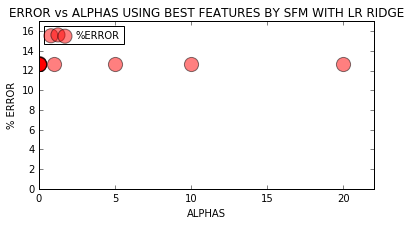

In [33]:
%pylab inline
import pylab
import csv
import sys
import numpy as np
from sklearn.linear_model import Ridge, Lasso, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score
from operator import itemgetter
import nltk
trainingModel = ['LinearReg_sansFS','LinearReg_avecFS','NonLinTransfReg_avecFS','SVR','Other']
dataA, headings = dataInput("train_set.csv")
headindsDigit = []
colDigit = colDigitFn(dataA)
print '\n\n', colDigit, '\n\n'
for col in colDigit:
    headindsDigit.append(headings[0][col])
#print 'headings = ',headings
degree = 2
#error_rbfA,error_linA,error_polyA = train0(dataA,colDigit,trainingModel[3],degree)
#print ' error_rbfA = ',error_rbfA,' error_linA = ',error_linA,'error_polyA = ',error_polyA
bestFeatures,SelectedFeatures,clf = train0(dataA,colDigit,trainingModel[1],degree)